# DATA MINING AND ANALYSIS COURSE PROJECT


# TITLE  : TALKING DATA MOBILE USER DEMOGRAPHICS

# PROBLEM STATEMENT:

Build a model predicting user's demographic characteristics based on their app usage,geolocation,and mobile device properties

In [180]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from pandas import Series
from sklearn.neighbors import KNeighborsClassifier
from subprocess import check_output
from sklearn import tree

from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
#Reading the train and test data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 
print("Reading the data...")
train=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/gender_age_train.csv");
test=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/gender_age_test.csv");
print("Data read")
train.head()


Populating the interactive namespace from numpy and matplotlib
Reading the data...
Data read


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [3]:
print(test.shape[0])
print(test.shape[1])



112071
1


In [4]:
test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [5]:
train.shape[0]

74645

In [6]:

# Combining into one dataset for cleaning
df_all=pd.concat((train, test), axis=0, ignore_index=True);
df_all= pd.concat([train, 
                      test], axis=1, join='inner')


In [7]:
train.shape[0]

74645

In [8]:
df_all.head()

,device_id,gender,age,group,device_id
0,-8076087639492063270,M,35,M32-38,1002079943728939269
1,-2897161552818060146,M,35,M32-38,-1547860181818787117
2,-8260683887967679142,M,35,M32-38,7374582448058474277
3,-4938849341048082022,M,30,M29-31,-6220210354783429585
4,245133531816851882,M,30,M29-31,-5893464122623104785


In [9]:
test.shape[0]

112071

In [10]:
df_all.shape[0]

74645

In [11]:

#to check number of unique device id in the train and test data
print(train.device_id.nunique())
print(test.device_id.nunique())

74645
112071


In [12]:
#Number of records - Number of Unique deviceID must be equal to Zero
#Checking whether the all the device_id in train and test data are unique or no
print(test.shape[0]-test.device_id.nunique())
print(train.shape[0]-train.device_id.nunique())
print(df_all.shape[0]-df_all.device_id.nunique())

0
0
device_id    0
device_id    0
dtype: int64


In [13]:
#Trying to remove outliers from column 'age'
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values <= min_val, col_values >= max_val), np.NaN, col_values)
    return df



# Fixing age column 
#The age value with less than 15 and more than 90 are considered to be outliers
df_all = remove_outliers(df = df_all, column = 'age', min_val = 15, max_val = 90)
df_all['age'].fillna(-1, inplace = True)





{'boxes': [<matplotlib.lines.Line2D at 0x7f58a95ec208>],
 'caps': [<matplotlib.lines.Line2D at 0x7f58a95fdbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f58a9604e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f58a96045f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58ef260630>,
  <matplotlib.lines.Line2D at 0x7f58a95ecda0>]}

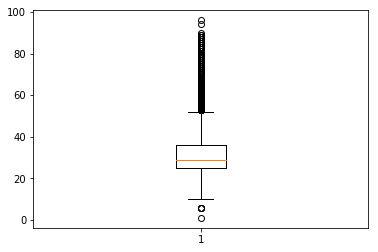

In [14]:
plt.boxplot(train.age)

In [15]:
df_all.head()

,device_id,gender,age,group,device_id
0,-8076087639492063270,M,35.0,M32-38,1002079943728939269
1,-2897161552818060146,M,35.0,M32-38,-1547860181818787117
2,-8260683887967679142,M,35.0,M32-38,7374582448058474277
3,-4938849341048082022,M,30.0,M29-31,-6220210354783429585
4,245133531816851882,M,30.0,M29-31,-5893464122623104785


In [16]:
df_all.shape[0]

74645

In [17]:
label_category=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/label_categories.csv");

In [18]:
label_category.head(10)

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time
5,6,game-Cutting things
6,7,game-Finding fault
7,8,game-stress reliever
8,9,game-pet
9,10,game-Answer


In [19]:

print(label_category.shape[0])

930


In [20]:

##printing the number of missing values in each column in Label_category.csv
print(label_category.isnull().sum())


label_id    0
category    3
dtype: int64


In [21]:
##removing the rows with missing value(NaN)

label_category.dropna(inplace=True)

In [22]:
label_category.shape[0]

927

In [23]:
import seaborn as sns

In [24]:

##printing the number of missing values in each column in df_all dataframe..
print(df_all.isnull().sum())

device_id      0
gender         0
age          146
group          0
device_id      0
dtype: int64


In [25]:
##removing the rows with missing value(NaN) in df_All data frame....
df_all.dropna(inplace=True)

In [26]:
df_all.shape[0]

74499

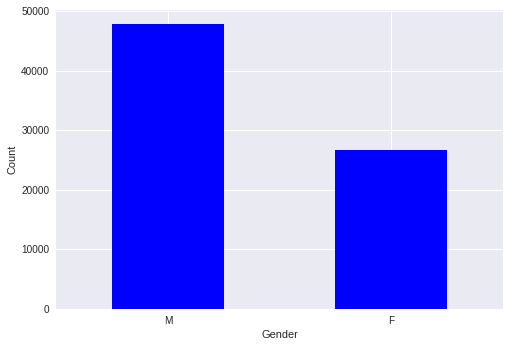

In [27]:
df_all.gender.value_counts(dropna=False).plot(kind='bar', color='blue', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')

##From the above Graph we can analyse that most of the mobile device users are Male 

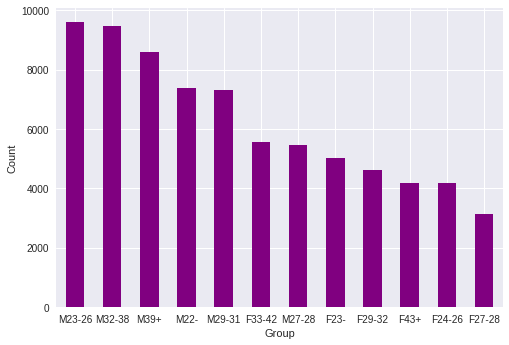

In [28]:
df_all.group.value_counts(dropna=False).plot(kind='bar', color='purple', rot=0)
plt.xlabel('Group')
plt.ylabel('Count')

##From the above Graph we can analyse that most of the mobile device users are Male with age group between 23-26
##Lowest number of mobile device users are Female with age group between 27-28

In [29]:
#reading app_labels.csv file
app_labels=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/app_labels.csv")

In [30]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [31]:
phone=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/phone_brand_device_model.csv")

In [32]:
phone.shape[0]

187245

In [33]:
phone = phone.drop_duplicates('device_id',keep='first')

In [34]:
phone.shape[0]

186716

In [35]:
##attribute selection


appevents=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/app_events.csv",  usecols=['event_id','app_id','is_active'])

appevents contain the attributes event_id ,app_id ,isactive ,is_intalled out of which the attribute is_intalled is of less interest.

In [36]:
appevents.head()

,event_id,app_id,is_active
0,2,5927333115845830913,1.0
1,2,-5720078949152207372,0.0
2,2,-1633887856876571208,0.0
3,2,-653184325010919369,1.0
4,2,8693964245073640147,1.0


# DATA TRANSFORMATION

In [37]:
#Implementation of ONE HOT ENCODING.
##converting into binary values.
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

def convert_to_binary2(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").lower()
        col_name = cat_name[:6]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df


print("One Hot Encoding categorical data...");
columns_to_convert = ['gender']

for column in columns_to_convert:
    df_all = convert_to_binary(df=df_all, column_to_convert=column)
    df_all.drop(column, axis=1, inplace=True)
    
columns_to_convert = ['group']

for column in columns_to_convert:
    df_all = convert_to_binary2(df=df_all, column_to_convert=column)
    df_all.drop(column, axis=1, inplace=True)
    
    
        
    
    
    
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [38]:
df_all.head(10)

,device_id,age,device_id,gende_m,gende_f,m32-38,m29-31,f24-26,f33-42,f27-28,m39+,m23-26,m27-28,m22-,f43+,f23-,f29-32
0,-8076087639492063270,35.0,1002079943728939269,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-2897161552818060146,35.0,-1547860181818787117,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-8260683887967679142,35.0,7374582448058474277,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-4938849341048082022,30.0,-6220210354783429585,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,245133531816851882,30.0,-5893464122623104785,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,-1297074871525174196,24.0,-7560708697029818408,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6,236877999787307864,36.0,289797889702373958,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,-8098239495777311881,38.0,-402874006399730161,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8,176515041953473526,33.0,5751283639860028129,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1596610250680140042,36.0,-848943298935149395,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [39]:
df_all.count()

device_id    74499
age          74499
device_id    74499
gende_m      74499
gende_f      74499
m32-38       74499
m29-31       74499
f24-26       74499
f33-42       74499
f27-28       74499
m39+         74499
m23-26       74499
m27-28       74499
m22-         74499
f43+         74499
f23-         74499
f29-32       74499
dtype: int64

In [40]:
df_all.shape[0]

74499

In [41]:

events=pd.read_csv("/home/ubuntu/5th sem/DMA PROJECT/events.csv")

In [42]:
# Add new date related fields - Creating New Features for events.csv file

In [43]:
print("Adding new fields...")

events['d'] = pd.to_datetime(events['timestamp'])
events['month_sdk_used'] = events['d'].dt.month

events['w'] = pd.to_datetime(events['timestamp'])
events['day_sdk_used'] = events['w'].dt.weekday

events['y'] = pd.to_datetime(events['timestamp'])
events['year_sdk_used'] = events['y'].dt.year

events['h'] = pd.to_datetime(events['timestamp'])
events['hour_sdk_used'] = events['w'].dt.hour

events['q'] = pd.to_datetime(events['timestamp'])
events['quarter_sdk_used'] = events['w'].dt.quarter

print("Adding new fields...completed")

#Drop unnecessary Columns.....
print("Droping fields...")
columns_to_drop = ['h', 'w', 'q', 'd','y','timestamp']
for column in columns_to_drop:
    if column in events.columns:
        events.drop(column, axis=1, inplace=True)
print("Droping fields...completed");




Adding new fields...
Adding new fields...completed
Droping fields...
Droping fields...completed


In [44]:
events.head()

,event_id,device_id,longitude,latitude,month_sdk_used,day_sdk_used,year_sdk_used,hour_sdk_used,quarter_sdk_used
0,1,29182687948017175,121.38,31.24,5,6,2016,0,2
1,2,-6401643145415154744,103.65,30.97,5,6,2016,0,2
2,3,-4833982096941402721,106.60,29.70,5,6,2016,0,2
3,4,-6815121365017318426,104.27,23.28,5,6,2016,0,2
4,5,-5373797595892518570,115.88,28.66,5,6,2016,0,2


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [46]:
#DATA TRANFORMATION,CONVERTING THE CATEGORIAL DATA INTO NUMERICAL VALUE

brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['phonebrand'] = brandencoder.transform(phone['phone_brand'])

In [47]:
phone.head(5)

,device_id,phone_brand,device_model,phonebrand
0,-8890648629457979026,小米,红米,51
1,1277779817574759137,小米,MI 2,51
2,5137427614288105724,三星,Galaxy S4,15
3,3669464369358936369,SUGAR,时尚手机,9
4,-5019277647504317457,三星,Galaxy Note 2,15


In [48]:
phone.head()

,device_id,phone_brand,device_model,phonebrand
0,-8890648629457979026,小米,红米,51
1,1277779817574759137,小米,MI 2,51
2,5137427614288105724,三星,Galaxy S4,15
3,3669464369358936369,SUGAR,时尚手机,9
4,-5019277647504317457,三星,Galaxy Note 2,15


In [49]:
#train['trainrow'] = np.arange(train.shape[0])

In [50]:
test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [51]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [52]:
train.shape[0]

74645

In [53]:
#DATA TRANFORMATION,CONVERTING THE CATEGORIAL DATA INTO NUMERICAL VALUE
device_model = phone.phone_brand.str.cat(phone.device_model)
modelencoder = LabelEncoder().fit(device_model)
phone['model'] = modelencoder.transform(device_model)

In [54]:
nMODEL = len(modelencoder.classes_)

In [55]:

#NUMBER OF DIFFERENT LABELS
nMODEL

1667

In [56]:
phone.head()

,device_id,phone_brand,device_model,phonebrand,model
0,-8890648629457979026,小米,红米,51,858
1,1277779817574759137,小米,MI 2,51,843
2,5137427614288105724,三星,Galaxy S4,15,371
3,3669464369358936369,SUGAR,时尚手机,9,166
4,-5019277647504317457,三星,Galaxy Note 2,15,347


In [57]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [58]:
#DATA TRANFORMATION,CONVERTING THE CATEGORIAL DATA INTO NUMERICAL VALUE
app_encoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = app_encoder.transform(appevents.app_id)

In [59]:
appevents.head()

,event_id,app_id,is_active,app
0,2,5927333115845830913,1.0,14928
1,2,-5720078949152207372,0.0,3269
2,2,-1633887856876571208,0.0,7369
3,2,-653184325010919369,1.0,8615
4,2,8693964245073640147,1.0,18118


In [60]:
#NUMBER OF DIFFERENT LABELS
napps = len(app_encoder.classes_)

In [61]:
napps

18650

In [62]:
events.head()

,event_id,device_id,longitude,latitude,month_sdk_used,day_sdk_used,year_sdk_used,hour_sdk_used,quarter_sdk_used
0,1,29182687948017175,121.38,31.24,5,6,2016,0,2
1,2,-6401643145415154744,103.65,30.97,5,6,2016,0,2
2,3,-4833982096941402721,106.60,29.70,5,6,2016,0,2
3,4,-6815121365017318426,104.27,23.28,5,6,2016,0,2
4,5,-5373797595892518570,115.88,28.66,5,6,2016,0,2


In [63]:
event1=events

In [64]:
#event1=pd.concat((event1, appevents), axis=0, ignore_index=True);

In [65]:
#event1.head(50)

In [66]:
#Apps are linked to devices through events
event1.set_index('event_id', inplace=True)
event1= pd.concat([event1, 
                      appevents], axis=1, join='inner')


In [67]:
event1.head()

,device_id,longitude,latitude,month_sdk_used,day_sdk_used,year_sdk_used,hour_sdk_used,quarter_sdk_used,event_id,app_id,is_active,app
1,29182687948017175,121.38,31.24,5,6,2016,0,2,2,-5720078949152207372,0.0,3269
2,-6401643145415154744,103.65,30.97,5,6,2016,0,2,2,-1633887856876571208,0.0,7369
3,-4833982096941402721,106.60,29.70,5,6,2016,0,2,2,-653184325010919369,1.0,8615
4,-6815121365017318426,104.27,23.28,5,6,2016,0,2,2,8693964245073640147,1.0,18118
5,-5373797595892518570,115.88,28.66,5,6,2016,0,2,2,4775896950989639373,1.0,13894


In [68]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [69]:
#MERGING THE ATTRIBUTES FROM PHONE AND TRAIN DATA

train = train.merge(phone[['device_id','phonebrand','model']], how='left',on='device_id')
train.head(3)



,device_id,gender,age,group,phonebrand,model
0,-8076087639492063270,M,35,M32-38,51,843
1,-2897161552818060146,M,35,M32-38,51,843
2,-8260683887967679142,M,35,M32-38,51,843


In [77]:
## Temp variables created to store data
df_train1 = train 
df_test1 = test
df_all1 = df_all
#y=train["group"]

In [78]:
train.head()

,device_id,gender,age,group,phonebrand,model
0,-8076087639492063270,M,35,M32-38,51,843
1,-2897161552818060146,M,35,M32-38,51,843
2,-8260683887967679142,M,35,M32-38,51,843
3,-4938849341048082022,M,30,M29-31,51,865
4,245133531816851882,M,30,M29-31,51,847


In [79]:
phone.head()

,device_id,phone_brand,device_model,phonebrand,model
0,-8890648629457979026,小米,红米,51,858
1,1277779817574759137,小米,MI 2,51,843
2,5137427614288105724,三星,Galaxy S4,15,371
3,3669464369358936369,SUGAR,时尚手机,9,166
4,-5019277647504317457,三星,Galaxy Note 2,15,347


In [80]:
#pd.concat((train, test), axis=0, ignore_index=True);
#df_train1.set_index('device_id', inplace=True)
#phone.set_index("device_id",inplace=True)


#concatinating the df_train1 and phone data with attributes phonebrand and model
df_train1 = pd.concat([df_train1, 
                       phone[["phonebrand","model"]]],axis=1, join='inner')


In [81]:

#df_train1.set_index('device_id', inplace=True)
#df_train1 = pd.concat([df_train1, 
 #                     event1], axis=1, join='outer')
    
#concatinating the df_train1 and event data
df_train1 = pd.concat([df_train1, 
                       event1[["app","event_id","is_active"]]],axis=1, join='inner')


In [82]:
gender_encoder = LabelEncoder().fit(df_train1.gender)
df_train1['genderclass'] = gender_encoder.transform(df_train1.gender)

In [83]:
group_encoder = LabelEncoder().fit(df_train1.group)
df_train1['groupclass'] = group_encoder.transform(df_train1.group)

In [84]:
y=df_train1["groupclass"];

In [85]:
x1=df_train1[["device_id","model","phonebrand","age","genderclass","app","event_id","is_active"]]

In [86]:
y.shape[0]

74592

In [87]:
x1.shape[0]

74592

In [88]:
df_train1.head()

,device_id,gender,age,group,phonebrand,model,phonebrand,model,app,event_id,is_active,genderclass,groupclass
1,-2897161552818060146,M,35,M32-38,51,843,51,843,3269,2,0.0,1,10
2,-8260683887967679142,M,35,M32-38,51,843,15,371,7369,2,0.0,1,10
3,-4938849341048082022,M,30,M29-31,51,865,9,166,8615,2,1.0,1,9
4,245133531816851882,M,30,M29-31,51,847,15,347,18118,2,1.0,1,9
5,-1297074871525174196,F,24,F24-26,7,121,31,671,13894,2,1.0,0,1


A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples 
of the dataset
and
use averaging to improve the predictive accuracy and control over-fitting.

-Random forest classifier will handle the missing values.
-When we have more trees in the forest, random forest classifier won’t overfit the model.   
-more robust to errors and outliers


In [89]:
x=df_train1[["device_id","model","age","genderclass","app","event_id","phonebrand"]]

In [90]:
x.shape[0]

74592

In [91]:
y.shape[0]

74592

In [92]:
df_train1.to_csv("DFTRAIN.csv",index=True
                 
                 
                 
                 

In [174]:
targetencoder = LabelEncoder().fit(df_train1.group)
#y = targetencoder.transform(train.group)
nclasses = len(targetencoder.classes_)


print(nclasses)



# BUILDING THE MODEL

# MULTICLASS LOGISTIC REGRESSION

In [93]:
mlogistic=[]

In [94]:

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [95]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train)
X_test_minmax=min_max.fit_transform(features_test)

In [96]:
test_accuracy=[]
train_accuracy=[]

In [97]:

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax, labels_train)
prediction = clf1.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf1= LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax, labels_train)
prediction = clf1.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))



test_accuracy:
0.675350790955
train_accuracy:
0.829605086758


In [98]:

from sklearn.linear_model import LogisticRegression
clf2= LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs')
clf2.fit(X_train_minmax, labels_train)
prediction = clf2.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs')
clf2.fit(X_train_minmax, labels_train)
prediction = clf2.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))



test_accuracy:
0.590311913486
train_accuracy:
0.550733519746


In [99]:

from sklearn.linear_model import LogisticRegression
clf3= LogisticRegression(C=2, multi_class='multinomial',solver='lbfgs')
clf3.fit(X_train_minmax, labels_train)
prediction = clf3.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf3= LogisticRegression(C=2, multi_class='multinomial',solver='lbfgs')
clf3.fit(X_train_minmax, labels_train)
prediction = clf3.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.659084815444
train_accuracy:
0.853947217221


In [100]:


from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression(C=3, multi_class='multinomial',solver='lbfgs')
clf4.fit(X_train_minmax, labels_train)
prediction = clf4.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression(C=3, multi_class='multinomial',solver='lbfgs')
clf4.fit(X_train_minmax, labels_train)
prediction = clf4.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.647689695236
train_accuracy:
0.832880070479


In [101]:

from sklearn.linear_model import LogisticRegression
clf5= LogisticRegression(C=4, multi_class='multinomial',solver='lbfgs')
clf5.fit(X_train_minmax, labels_train)
prediction = clf5.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf5= LogisticRegression(C=4, multi_class='multinomial',solver='lbfgs')
clf5.fit(X_train_minmax, labels_train)
prediction = clf5.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.679283224596
train_accuracy:
0.835254912476


In [102]:

from sklearn.linear_model import LogisticRegression
clf6= LogisticRegression(C=5, multi_class='multinomial',solver='lbfgs')
clf6.fit(X_train_minmax, labels_train)
prediction = clf6.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf6= LogisticRegression(C=5, multi_class='multinomial',solver='lbfgs')
clf6.fit(X_train_minmax, labels_train)
prediction = clf6.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.630440611315
train_accuracy:
0.814589956717


In [103]:

from sklearn.linear_model import LogisticRegression
clf7= LogisticRegression(C=0.005, multi_class='multinomial',solver='lbfgs')
clf7.fit(X_train_minmax, labels_train)
prediction = clf7.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf7= LogisticRegression(C=0.005, multi_class='multinomial',solver='lbfgs')
clf7.fit(X_train_minmax, labels_train)
prediction = clf7.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.474037000626
train_accuracy:
0.465622246907


In [104]:

from sklearn.linear_model import LogisticRegression
clf8= LogisticRegression(C=0.001, multi_class='multinomial',solver='lbfgs')
clf8.fit(X_train_minmax, labels_train)
prediction = clf8.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf8= LogisticRegression(C=0.001, multi_class='multinomial',solver='lbfgs')
clf8.fit(X_train_minmax, labels_train)
prediction = clf8.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.338323353293
train_accuracy:
0.316792431149


In [105]:

from sklearn.linear_model import LogisticRegression
clf9= LogisticRegression(C=10, multi_class='multinomial',solver='lbfgs')
clf9.fit(X_train_minmax, labels_train)
prediction = clf9.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf9= LogisticRegression(C=10, multi_class='multinomial',solver='lbfgs')
clf9.fit(X_train_minmax, labels_train)
prediction = clf9.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.664089730986
train_accuracy:
0.851840502547


In [106]:

from sklearn.linear_model import LogisticRegression
clf10= LogisticRegression(C=100, multi_class='multinomial',solver='lbfgs')
clf10.fit(X_train_minmax, labels_train)
prediction = clf10.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("test_accuracy:");
print (accuracy_score(prediction, labels_test))
test_accuracy.append(accuracy_score(prediction, labels_test))



from sklearn.linear_model import LogisticRegression
clf10= LogisticRegression(C=100, multi_class='multinomial',solver='lbfgs')
clf10.fit(X_train_minmax, labels_train)
prediction = clf10.predict(X_train_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy:");
print (accuracy_score(prediction, labels_train))
train_accuracy.append(accuracy_score(prediction, labels_train))


test_accuracy:
0.690723031549
train_accuracy:
0.941318420347


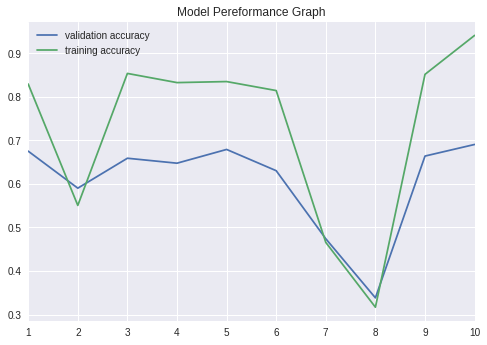

In [108]:
data=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10])
data['validation accuracy']=test_accuracy
data['training accuracy']=train_accuracy
#dat.set_index("models")
data.plot(title="Model Pereformance Graph")

In [109]:

data['difference']=data['validation accuracy']-data['training accuracy']
print(data)

    validation accuracy  training accuracy  difference
1              0.675351           0.829605   -0.154254
2              0.590312           0.550734    0.039578
3              0.659085           0.853947   -0.194862
4              0.647690           0.832880   -0.185190
5              0.679283           0.835255   -0.155972
6              0.630441           0.814590   -0.184149
7              0.474037           0.465622    0.008415
8              0.338323           0.316792    0.021531
9              0.664090           0.851841   -0.187751
10             0.690723           0.941318   -0.250595


In [110]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Split the dataset in two equal parts

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
 #                    'C': [1, 10, 100, 1000]},
  #                  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs')
 #Set the parameters by cross-validation
   # ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
tuned_parameters = [{'multi_class': ["multinomial"], 'solver': ["lbfgs"],
                     'C': [1, 10, 100, 1000,10000,0.5,0.02,0.001]}]


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

Best parameters set found on development set:

{'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

Grid scores on development set:

0.015 (+/-0.008) for {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 10, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 10000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 0.02, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.015 (+/-0.008) for {'C': 0.001, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

Grid scores on development set:

0.080 (+/-0.007) for {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 10, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 10000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 0.02, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.080 (+/-0.007) for {'C': 0.001, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# FROM ABOVE GRID SEARCH METHOD USED FOR PARAMETRIC TUNING , THE BEST PARAMETERS FOUND ON DEVELOPMENT SET:{'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


In [177]:

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax, labels_train)
prediction = clf1.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test))
mlogistic.append(accuracy_score(prediction, labels_test))


0.675350790955


In [112]:


class_names = train["group"].values

In [113]:
class_names

array(['M32-38', 'M32-38', 'M32-38', ..., 'M22-', 'M32-38', 'M23-26'], dtype=object)

In [114]:
class_names=set(class_names)

In [115]:
class_names

{'F23-',
 'F24-26',
 'F27-28',
 'F29-32',
 'F33-42',
 'F43+',
 'M22-',
 'M23-26',
 'M27-28',
 'M29-31',
 'M32-38',
 'M39+'}

In [165]:
len(class_names)

12

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0    0    0  660  659]
 [   0    0    0    0    0    0    0    0    0    0  539  485]
 [   0    0    0    0    0    0    0    0    0    0  380  380]
 [   0    0    0    0    0    0    0    0    0    0  560  590]
 [   0    0    0    0    0    0    0    0    0    0  687  702]
 [   0    0    0    0    0    0    0    0    0    0  501  535]
 [   0    0    0    0    0    0    0    0    0    0  951  954]
 [   0    0    0    0    0    0    0    0    0    0 1199 1231]
 [   0    0    0    0    0    0    0    0    0    0  689  634]
 [   0    0    0    0    0    0    0    0    0    0  904  895]
 [   0    0    0    0    0    0    0    0    0    0 1198 1209]
 [   0    0    0    0    0    0    0    0    0    0 1087 1019]]
Normalized confusion matrix
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.53  0.47]
 [ 0.    0.    0.    0.  

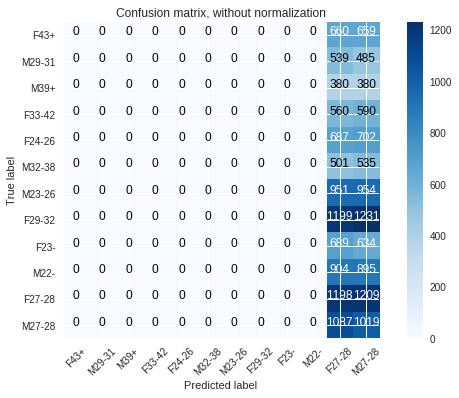

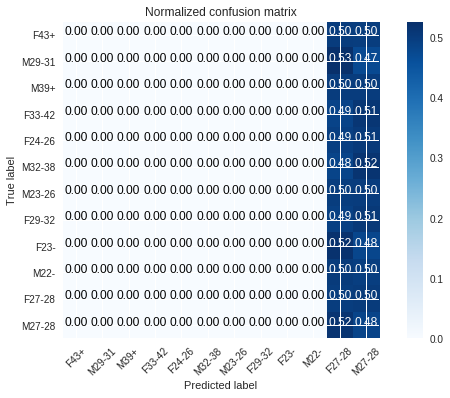

In [116]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier =LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Automatically created module for IPython interactive environment


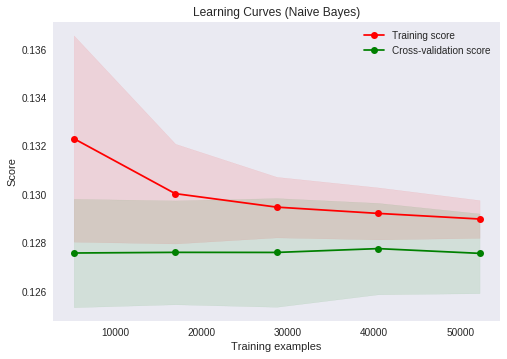

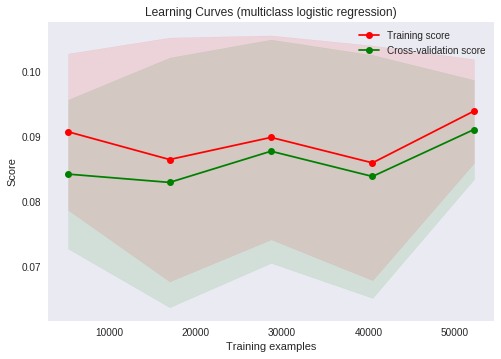

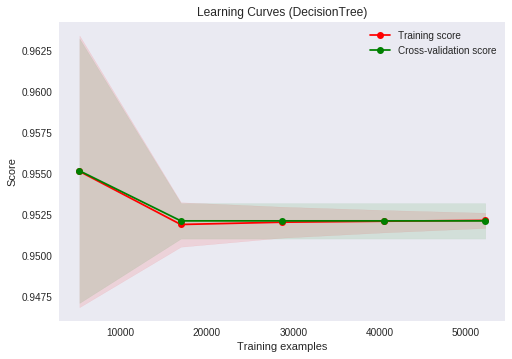

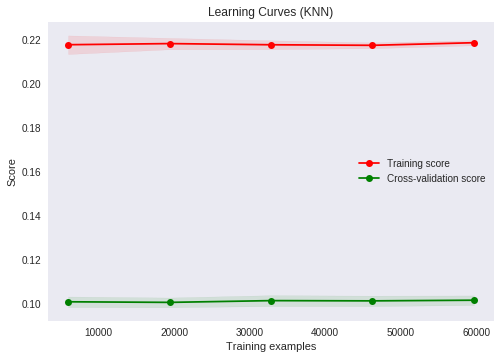

In [117]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x, y, cv=cv, n_jobs=4)

title = "Learning Curves (multiclass logistic regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
plot_learning_curve(estimator, title, x, y, cv=cv, n_jobs=4)


title = "Learning Curves (DecisionTree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)
plot_learning_curve(estimator, title, x, y, cv=cv, n_jobs=4)



title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(estimator, title, x, y, cv=cv, n_jobs=4)

plt.show()


THE ABOVE GRAPHS LEARNING CURVES

The graph plots the training score and Cross_validation_score and can be divided into overaching regimes.

FOR DECISION TREE:
In the First Regime (on the left side of the graph ),Training score is  slightly below the desired error threshold but cross_validation score is significantly higher
In the Second Regime(on the right side of the graph),Cross_validation score is remarkable close to the training score
So training  is score much lower than test error.
FIRST REGIME: High_variance.
SECOND RECOND:High_Bias.
Training_score and cross_validation score converge, Hence no benifit adding more training data


FOR KNN:
    Training score is much greater than validation score then,adding more training samples will most likely increase the generalisation
   .Lower Bias.

For Multiclass logistic regression
TRAINING SCORE is higher than Cross_Validation_score
    

In [ ]:
FOR 

In [120]:
targetencoder = LabelEncoder().fit(df_train1.group)
#y1 = targetencoder.transform(df_train1.group)
n_classes = len(targetencoder.classes_)

In [178]:
pred = pd.DataFrame(clf1.predict_proba(X_test_minmax),columns=targetencoder.classes_)
pred.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,3.584252e-04,2.215563e-03,2.226144e-03,1.036946e-03,7.593407e-05,1.219893e-05,4.291187e-02,3.541514e-01,2.636694e-01,2.416091e-01,9.001403e-02,0.001719
1,3.766803e-06,1.946578e-05,2.189674e-05,1.161858e-05,5.306429e-07,7.828944e-08,9.022788e-02,4.436509e-01,2.344540e-01,1.810427e-01,4.968847e-02,0.000879
2,3.767693e-24,1.953228e-16,4.229061e-13,1.180136e-09,5.505138e-05,8.624352e-01,1.092673e-39,2.546177e-27,1.164871e-19,1.271425e-14,1.869428e-08,0.137510
3,9.319032e-06,3.319796e-05,3.835796e-05,1.680425e-05,6.764468e-07,7.788115e-08,1.877731e-01,4.723315e-01,2.000823e-01,1.160958e-01,2.332885e-02,0.000290
4,4.053817e-08,9.610427e-06,4.782508e-05,1.200424e-04,1.166681e-04,3.407691e-04,1.236823e-06,1.370739e-03,1.152216e-02,1.145432e-01,5.909663e-01,0.280961


In [179]:
pred.to_csv('result_final.csv',index=True)

# POST PROCESSING

TAKING 10% OF TRAINING DATA

In [272]:
train_10=df_train1.head(7465)
x10=train_10[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y10=train_10["groupclass"]

In [273]:

from sklearn import cross_validation
features_train10, features_test10, labels_train10, labels_test10 = cross_validation.train_test_split(x10, y10, test_size=0.3, random_state=42)


In [274]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax10=min_max.fit_transform(features_train10)
X_test_minmax10=min_max.fit_transform(features_test10)

In [275]:

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax10, labels_train10)
prediction = clf1.predict(X_test_minmax10)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test10))
mlogistic.append(accuracy_score(prediction, labels_test10))


0.657142857143


TAKING 20% of the training data

In [276]:
train_20=pd.read_csv("/home/ubuntu/DFTRAIN.csv",skiprows=7465,nrows=14930)
train_20=df_train1.head(14930)
x20=train_20[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y20=train_20["groupclass"]

In [277]:

from sklearn import cross_validation
features_train20, features_test20, labels_train20, labels_test20 = cross_validation.train_test_split(x20, y20, test_size=0.3, random_state=42)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax20=min_max.fit_transform(features_train20)
X_test_minmax20=min_max.fit_transform(features_test20)

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax20, labels_train20)
prediction = clf1.predict(X_test_minmax20)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test20))
mlogistic.append(accuracy_score(prediction, labels_test20))


0.302299620451


TAKING 30% OF DATA

In [278]:
#train_30=pd.read_csv("/home/ubuntu/DFTRAIN.csv",skiprows=14930,nrows=22395)
train_30=df_train1.head(22395)
x30=train_30[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y30=train_30["groupclass"]

In [299]:


from sklearn import cross_validation
features_train30, features_test30, labels_train30, labels_test30 = cross_validation.train_test_split(x30, y30, test_size=0.3, random_state=42)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax30=min_max.fit_transform(features_train30)
X_test_minmax30=min_max.fit_transform(features_test30)

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax30, labels_train30)
prediction = clf1.predict(X_test_minmax30)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test30))
mlogistic.append(accuracy_score(prediction, labels_test30))


0.405417472838


TAKING 40% OF DATA

In [280]:
train_40=df_train1.head(29860)
x40=train_40[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y40=train_40["groupclass"]



from sklearn import cross_validation
features_train40, features_test40, labels_train40, labels_test40 = cross_validation.train_test_split(x40, y40, test_size=0.3, random_state=42)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax40=min_max.fit_transform(features_train40)
X_test_minmax40=min_max.fit_transform(features_test40)

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax40, labels_train40)
prediction = clf1.predict(X_test_minmax40)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test40))
mlogistic.append(accuracy_score(prediction, labels_test40))



0.359790131726


TAKING 70% DATA

In [123]:
train_70=df_train1.head(52255)
x70=train_70[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y70=train_70["groupclass"]



from sklearn import cross_validation
features_train70, features_test70, labels_train70, labels_test70 = cross_validation.train_test_split(x70, y70, test_size=0.2, random_state=0)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax70=min_max.fit_transform(features_train70)
X_test_minmax70=min_max.fit_transform(features_test70)

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax70, labels_train70)
prediction = clf1.predict(X_test_minmax70)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test70))
mlogistic.append(accuracy_score(prediction, labels_test70))

0.353171945268


TAKING 90% OF DATA

In [124]:
train_90=df_train1.head(67185)
x90=train_90[["device_id","model","age","genderclass","app","event_id","phonebrand"]]
y90=train_90["groupclass"]



from sklearn import cross_validation
features_train90, features_test90, labels_train90, labels_test90 = cross_validation.train_test_split(x90, y90, test_size=0.3, random_state=0)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax90=min_max.fit_transform(features_train90)
X_test_minmax90=min_max.fit_transform(features_test90)

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs')
clf1.fit(X_train_minmax90, labels_train90)
prediction = clf1.predict(X_test_minmax90)
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, labels_test90))
mlogistic.append(accuracy_score(prediction, labels_test90))

0.695574518754


# DECISION TREE

In [125]:
print(__doc__)



X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)

tuned_parameters = [{'max_depth': [1,10,100,1000], 'min_samples_leaf': [1,2,3,5,7,10],
                     'min_samples_split': [0.1,0.2,0.5,0.7,0.9]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

Best parameters set found on development set:

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 0.1}

Grid scores on development set:

0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.1}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.2}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.5}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.7}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.9}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.1}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.2}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.5}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.7}
0.047 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_sam

Best parameters set found on development set:

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 0.1}

Grid scores on development set:

0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.1}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.2}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.5}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.7}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.9}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.1}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.2}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.5}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.7}
0.167 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_sam

In [126]:
mdec=[]
    
from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec.fit(X_train_minmax, labels_train)
prediction = dec.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test)
print(test_accuracy)
mdec.append(test_accuracy)

0.655465189025


# CONFUSION MATRIX FOR DECISION TREE

Confusion matrix, without normalization
[[1033  286    0    0    0    0    0    0    0    0    0    0]
 [   0 1024    0    0    0    0    0    0    0    0    0    0]
 [   0    0  760    0    0    0    0    0    0    0    0    0]
 [   0    0    0  923  227    0    0    0    0    0    0    0]
 [   0    0    0    0  991  398    0    0    0    0    0    0]
 [   0    0    0    0    0 1036    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1905    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2430    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1323    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1799    0    0]
 [   0    0    0    0    0    0    0    0    0    0 2407    0]
 [   0    0    0    0    0    0    0    0    0    0    0 2106]]
Normalized confusion matrix
[[ 0.78  0.22  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.  

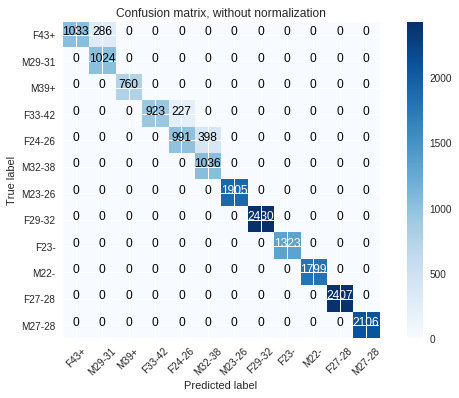

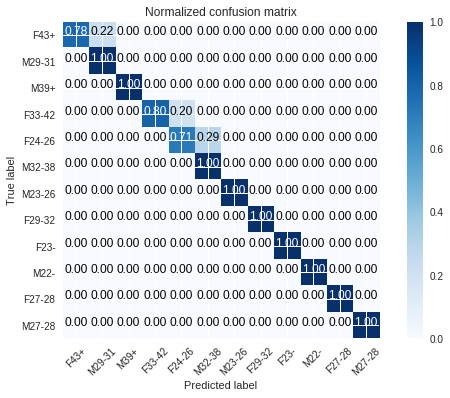

In [127]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)
y_pred=clf.fit(X_train,y_train).predict(X_test)

#classifier =LogisticRegression(C=100, multi_class='multinomial',solver='lbfgs')
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# POST PROCESSING FOR DECISION TREE

In [129]:
train_10=df_train1.head(7465)
#POST PROCESSING

#Find accuracy for tuned parameters
#Splitting the dataset

x10=train_10[["device_id","model","age","genderclass","app","event_id"]]
y10=train_10[["groupclass"]]


from sklearn import cross_validation
## Spliting of training dataset into 60% training data and 40% testing data randomly
features_train10, features_test10, labels_train10, labels_test10 = cross_validation.train_test_split(x10, y10, test_size=0.4, random_state=42)

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train10)
X_test_minmax=min_max.fit_transform(features_test10)


from sklearn import tree
dec10 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec10.fit(X_train_minmax, labels_train10)
prediction = dec10.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test10)
print(test_accuracy)
mdec.append(test_accuracy)


0.752511721366


TAKING 20% OF DATA

In [130]:
#Taking 20% of the training data
df_train1
train_20=df_train1.head(14930)
x20=train_20[["device_id","model","age","genderclass","app","event_id"]]
y20=train_20[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 50% training data and 50% testing data randomly
features_train20, features_test20, labels_train20, labels_test20 = cross_validation.train_test_split(x20, y20,
                                                                                             
                                                            test_size=0.5, random_state=42)
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train20)
X_test_minmax=min_max.fit_transform(features_test20)

    
from sklearn import tree
dec20 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec20.fit(X_train_minmax, labels_train20)
prediction = dec20.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test20)
print(test_accuracy)
mdec.append(test_accuracy)


0.2834561286


TAKING 30% OF DATA

In [132]:
#30% split

#Taking 30% of the training data
df_train1
train_30=df_train1.head(22395)
x30=train_30[["device_id","model","age","genderclass","app","event_id"]]
y30=train_30[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train30, features_test30, labels_train30, labels_test30 = cross_validation.train_test_split(x30, y30,
                                                                                             
                                                            test_size=0.3, random_state=42)
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train30)
X_test_minmax=min_max.fit_transform(features_test30)
from sklearn import tree
dec30= tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

  
from sklearn import tree
dec30 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec30.fit(X_train_minmax, labels_train30)
prediction = dec30.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test30)
print(test_accuracy)
mdec.append(test_accuracy)

0.380711415389


TAKING 40% OF DATA

In [134]:
#40% split

#Taking 40% of the training data
df_train1
train_40=df_train1.head(29860)
x40=train_40[["device_id","model","age","genderclass","app","event_id"]]
y40=train_40[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train40, features_test40, labels_train40, labels_test40 = cross_validation.train_test_split(x40, y40,
                                                                                             
                                                            test_size=0.3, random_state=42)

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train40)
X_test_minmax=min_max.fit_transform(features_test40)


from sklearn import tree
dec40= tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)


from sklearn import tree
dec40 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec40.fit(X_train_minmax, labels_train40)
prediction = dec40.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test40)
print(test_accuracy)
mdec.append(test_accuracy)

0.355101585175


TAKING 70% OF DATA

In [136]:
#70% split

#Taking 70% of the training data
df_train1
train_70=df_train1.head(52255)
x70=train_70[["device_id","model","age","genderclass","app","event_id"]]
y70=train_70[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train70, features_test70, labels_train70, labels_test70 = cross_validation.train_test_split(x70, y70,
                                                                                             
                                                            test_size=0.3, random_state=42)
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train70)
X_test_minmax=min_max.fit_transform(features_test70)

from sklearn import tree
dec70= tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

    
from sklearn import tree
dec70 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec70.fit(X_train_minmax, labels_train70)
prediction = dec70.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test70)
print(test_accuracy)
mdec.append(test_accuracy)

0.395228678956


TAKING 90% OF DATA

In [135]:
#90% split

#Taking 90% of the training data
df_train1
train_90=df_train1.head(67185)
x90=train_90[["device_id","model","age","genderclass","app","event_id"]]
y90=train_90[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train90, features_test90, labels_train90, labels_test90 = cross_validation.train_test_split(x90, y90,
                                                                                             
                                                            test_size=0.3, random_state=42)

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train90)
X_test_minmax=min_max.fit_transform(features_test90)

              
    
from sklearn import tree
dec90 = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=0.1)

dec90.fit(X_train_minmax, labels_train90)
prediction = dec90.predict(X_test_minmax)
## Computing accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(prediction, labels_test90)
print(test_accuracy)
mdec.append(test_accuracy)

0.367483627704


# K NEAREST NEIGHBOR

In [137]:
train_accuracy=[]
test_accuracy=[] 

In [139]:

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train)
X_test_minmax=min_max.fit_transform(features_test)





In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(labels_train,knn.predict(X_train_minmax))
print("train accuracy")
print(accuracy)
train_accuracy.append(accuracy)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy)


train accuracy
0.587964913625
test accuracy
0.435025471445


In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=5)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(labels_train,knn.predict(X_train_minmax))
print("train accuracy")
print(accuracy)
train_accuracy.append(accuracy)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=5)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)





train accuracy
0.549316275328
test accuracy
0.446375904907


In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(labels_train,knn.predict(X_train_minmax))
print("train accuracy")
print(accuracy)
train_accuracy.append(accuracy)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
print("test accuracy")
accuracy1=accuracy_score(labels_test,knn.predict(X_test_minmax))
print(accuracy1)
test_accuracy.append(accuracy1)



train accuracy
0.531466656452
test accuracy
0.454419519171


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=40,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(labels_train,knn.predict(X_train_minmax))
print("train accuracy")
print(accuracy)
train_accuracy.append(accuracy)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=40,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)


train accuracy
0.520147853066
test accuracy
0.456206989007


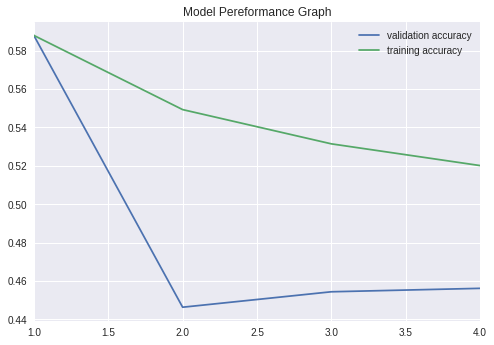

In [144]:
dta=pd.DataFrame(index=[1,2,3,4])
dta['validation accuracy']=test_accuracy
dta['training accuracy']=train_accuracy
#dat.set_index("models")
dta.plot(title="Model Pereformance Graph")

# In KNN method we get "sweet spot" at n_neighbour=20 so this is best model.

In [145]:

minimum=[]
dta['difference']=dta['validation accuracy']-dta['training accuracy']
minimum.append(min(dta['difference']))
print(dta['difference'])



print(dta)

1    0.000000
2   -0.102940
3   -0.077047
4   -0.063941
Name: difference, dtype: float64
   validation accuracy  training accuracy  difference
1             0.587965           0.587965    0.000000
2             0.446376           0.549316   -0.102940
3             0.454420           0.531467   -0.077047
4             0.456207           0.520148   -0.063941


FROM ABOVE THE DIFFERENCE BETWEEN TRAIN AND TEST ACCURACY IS LESS FOR PARAMETER N_NEIGHBORS=20 AND EVEN FROM THE GRAPH

# CONFUSION MATRIX

Confusion matrix, without normalization
[[ 76  57  21  64 103  55 157 292  56 100 203 135]
 [ 66  45  18  51  61  31 126 218  45  94 173  96]
 [ 47  37  14  37  69  19  91 172  35  53 101  85]
 [ 72  42  19  57  76  48 143 243  48 101 168 133]
 [ 95  63  24  65  88  36 161 285  57 134 229 152]
 [ 64  52  24  62  58  28 144 205  42  90 155 112]
 [139  79  36 101 119  50 243 428  78 160 278 194]
 [170  89  40 118 169  88 308 508  97 209 358 276]
 [ 94  60  13  63 102  47 157 245  66 135 224 117]
 [120  64  31  84 121  55 243 387  77 172 265 180]
 [188  96  46 117 146  69 311 494 108 218 357 257]
 [142 101  38 117 135  54 256 456  83 168 337 219]]
Normalized confusion matrix
[[ 0.06  0.04  0.02  0.05  0.08  0.04  0.12  0.22  0.04  0.08  0.15  0.1 ]
 [ 0.06  0.04  0.02  0.05  0.06  0.03  0.12  0.21  0.04  0.09  0.17  0.09]
 [ 0.06  0.05  0.02  0.05  0.09  0.03  0.12  0.23  0.05  0.07  0.13  0.11]
 [ 0.06  0.04  0.02  0.05  0.07  0.04  0.12  0.21  0.04  0.09  0.15  0.12]
 [ 0.07  0.05  0.02

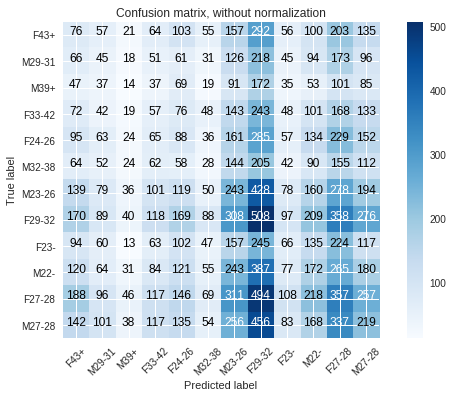

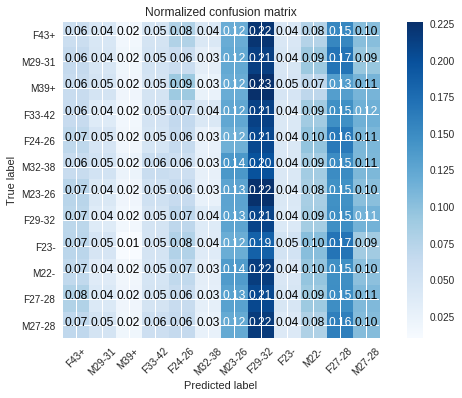

In [147]:
##confustion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier =KNeighborsClassifier(n_neighbors=20,weights='uniform', 
                                                   algorithm='auto', leaf_size=30, p=2, n_jobs=1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# POST PROCESSING FOR K NEAREST NEIGHBORS

TAKING 10% OF DATA

In [152]:
#10% split PCA
test_accuracy=[]

train_10=df_train1.head(7465)
x10=train_10[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y10=train_10[["groupclass"]]
from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train10, features_test10, labels_train10, labels_test10 = cross_validation.train_test_split(x10, y10, test_size=0.3, random_state=42)
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
#Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train10)
X_test_minmax=min_max.fit_transform(features_test10)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train10)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test10,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)


test accuracy
0.462053571429


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [150]:
#20%

train_20=df_train1.head(149300)
x20=train_20[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y20=train_20[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train20, features_test20, labels_train20, labels_test20 = cross_validation.train_test_split(x20, 
                                                                                    y20, test_size=0.5, random_state=42)


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train20)
X_test_minmax=min_max.fit_transform(features_test20)




from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train20)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test20,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


test accuracy
0.424066924067


In [151]:
train_30=df_train1.head(22395)
x30=train_30[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y30=train_30[["groupclass"]]
       
    
    
from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train30, features_test30, labels_train30, labels_test30 = cross_validation.train_test_split(x30, 
                                                                                    y30, test_size=0.5, random_state=42)


    
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train30)
X_test_minmax=min_max.fit_transform(features_test30)

                                                                            
                                                                                                     
                                                                                                     
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train30)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test30,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)



/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


test accuracy
0.380692980889


In [154]:
#40%

train_40=df_train1.head(29860)
x40=train_40[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y40=train_40[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train40, features_test40, labels_train40, labels_test40 = cross_validation.train_test_split(x40,
                                                                                y40, test_size=0.3, random_state=0)
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
#Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train40)
X_test_minmax=min_max.fit_transform(features_test40)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train40)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test40,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


test accuracy
0.292587631168


In [156]:
#70%

train_70=df_train1.head(37325)
x70=train_70[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y70=train_70[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train70, features_test70, labels_train70, labels_test70 = cross_validation.train_test_split(x70,
                                                                                    y70, test_size=0.7, random_state=0)


#Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train70)
X_test_minmax=min_max.fit_transform(features_test70)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train70)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test70,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


test accuracy
0.399379975505


In [157]:
#90%

train_90=df_train1.head(67185)
x90=train_90[["device_id","model","phonebrand","age","genderclass","app","event_id"]]
y90=train_90[["groupclass"]]

from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train90, features_test90, labels_train90, labels_test90 = cross_validation.train_test_split(x90, 
                                                                                                     
                                                                                y90, test_size=0.2, random_state=0)

# Importing MinMaxScaler and initializing it
#from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(features_train90)
X_test_minmax=min_max.fit_transform(features_test90)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
knn.fit(X_train_minmax,labels_train90)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(labels_test90,knn.predict(X_test_minmax))
print("test accuracy")
print(accuracy1)
test_accuracy.append(accuracy1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


test accuracy
0.456500707003


# MODEL SELECTION 

In [170]:
MULTICLASS_LOGISTIC_REGRESSION=[64,66,30.2,41,10,35.3,70]
SVM=[60.18,38,33,42,41.08,41,36.10]
DECISION_TREE=[66,75.25,28.34,38.07,36,40,37]
KNN=[55.2,49.2,49.6,45.2,28,44,54.02]

In [171]:
sum_lr=sum_svm=sum_dt=sum_knn=0
for i in range(7):
    sum_lr=MULTICLASS_LOGISTIC_REGRESSION[i]+sum_lr
    sum_svm=SVM[i]+sum_svm
    sum_dt=sum_dt+DECISION_TREE[i]
    sum_knn=sum_knn+KNN[i]

In [172]:
avg_lr=sum_lr/7.0;
avg_svm=sum_svm/7.0;
avg_knn=sum_knn/7.0;
avg_dt=sum_dt/7.0;


print("Avg of accuracies for KNN: ",avg_knn)
print("Avg of accuracies for svm: ",avg_svm)
print("Avg of accuracies for decision_tree: ",avg_dt)
print("Avg of accuracies for multiclass_logistic_regression: ",avg_lr)

Avg of accuracies for KNN:  46.459999999999994
Avg of accuracies for svm:  41.62285714285714
Avg of accuracies for decision_tree:  45.808571428571426
Avg of accuracies for multiclass_logistic_regression:  45.214285714285715


# FROM ABOVE RESULT,AVERAGE OF ACCURACIES IS GREATER FOR KNN,SO THE BEST MODEL IS KNN CLASSIFIER WITH HYPERPARAMETER n_neighbors =20